In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import re
from pprint import PrettyPrinter
from datetime import datetime, time

#Data visualization libraries
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt

#Machine learning libraries


#Ignore FutureWarnings to avoid clutter in the output
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize PrettyPrinter for neat printing
pp = PrettyPrinter(indent=2)

In [2]:
#Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)
#Set the maximum number of displayed rows for Pandas DataFrames to 30
pd.set_option('display.max_rows', 30)

In [1]:
!pip freeze > requirements.txt


In [3]:
#Read the original CSV file into a DataFrame
df_original = pd.read_csv(r"C:\Users\ragha\Documents\ZEN_PROJECT\Singapore flat\Resale flat prices based on registration date from Jan-2017 onwards.csv")

#Create a copy of the original DataFrame to work with
df = df_original.copy()

In [4]:
#Initial inspection
print("Shape:", df.shape)
print("\n Columns:\n", df.columns)
print("\n Data Types:\n", df.dtypes)
print("\n Null Values:\n", df.isnull().sum())
print("\n First 5 Rows:\n", df.head())

Shape: (205801, 11)

 Columns:
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

 Data Types:
 month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

 Null Values:
 month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

 First 5 Rows:
      month        town flat_type block        street_name storey_range  \

In [5]:
#Display descriptive statistics for numerical columns in the DataFrame
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,205801.000000,205801.000000,2.058010e+05
mean,96.899790,1996.284114,5.140063e+05
std,24.030484,14.212633,1.808461e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.800000e+05
50%,93.000000,1996.000000,4.808880e+05
75%,112.000000,2011.000000,6.168000e+05
max,366.700000,2021.000000,1.600000e+06


In [6]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df.describe(include="O")

,month,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease
count,205801,205801,205801,205801,205801,205801,205801,205801
unique,101,26,7,2740,574,17,21,687
top,2024-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,Model A,94 years 10 months
freq,3036,16935,87025,624,2954,47280,72826,1855


In [7]:
"""
#Get the names of categorical columns in the DataFrame
categorical_columns=df.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns=df.select_dtypes(include='number').columns
#Iterate over each categorical column in the DataFrame
for i in categorical_columns:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df[i]))
    #Print the count of each unique value in the current categorical column
    print(df[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)"""

"\n#Get the names of categorical columns in the DataFrame\ncategorical_columns=df.select_dtypes(include='O').columns\n#Get the names of numerical columns in the DataFrame\nnumerical_columns=df.select_dtypes(include='number').columns\n#Iterate over each categorical column in the DataFrame\nfor i in categorical_columns:\n    #Print the unique values of the current categorical column\n    print('Unique values of', i, set(df[i]))\n    #Print the count of each unique value in the current categorical column\n    print(df[i].value_counts())\n    #Print a separator line for better readability\n    print('-' * 50)"

In [8]:
#Convert 'month' Column to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')
df['year'] = df['month'].dt.year
df['month_in'] = df['month'].dt.month

In [9]:
#Parse 'remaining_lease' to Total Months
def lease_to_months(lease_str):
    years = months = 0
    if pd.isna(lease_str):
        return np.nan
    ym = re.search(r'(\d+)\s*year', lease_str)
   
    if ym:
        years = int(ym.group(1))
   
    return years

df['remaining_lease_years'] = df['remaining_lease'].apply(lease_to_months)

In [10]:
#Extract Average Storey from 'storey_range'
df['storey_avg'] = df['storey_range'].str.extract(r'(\d+)\s+TO\s+(\d+)').astype(float).mean(axis=1)

In [11]:
#Calculate Lease Age at Transaction (in years)
df['lease_age'] = df['month'].dt.year - df['lease_commence_date']

In [12]:
df['Current_remaining_lease_years'] = df['remaining_lease_years'] - (pd.Timestamp.now().year - df['month'].dt.year)

In [13]:
df.sample(n=10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_in,remaining_lease_years,storey_avg,lease_age,Current_remaining_lease_years
178168,2024-04-01,GEYLANG,4 ROOM,338,UBI AVE 1,01 TO 03,104.0,Model A,1986,61 years,568000.0,2024,4,61,2.0,38,60
180836,2024-02-01,JURONG WEST,4 ROOM,349,CORPORATION DR,01 TO 03,103.0,Model A,1997,72 years 11 months,450000.0,2024,2,72,2.0,27,71
53680,2019-07-01,PUNGGOL,5 ROOM,107C,EDGEFIELD PLAINS,10 TO 12,110.0,Improved,2003,82 years 09 months,445000.0,2019,7,82,11.0,16,76
94687,2021-04-01,ANG MO KIO,3 ROOM,180,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,59 years 01 month,270000.0,2021,4,59,2.0,40,55
39114,2018-11-01,BUKIT MERAH,4 ROOM,10A,BOON TIONG RD,34 TO 36,93.0,Model A,2016,96 years 02 months,1008000.0,2018,11,96,35.0,2,89
22658,2018-02-01,WOODLANDS,5 ROOM,5A,MARSILING DR,04 TO 06,110.0,Improved,2002,83 years 03 months,360000.0,2018,2,83,5.0,16,76
56518,2019-09-01,ANG MO KIO,4 ROOM,254,ANG MO KIO AVE 4,10 TO 12,97.0,New Generation,1977,56 years 10 months,413000.0,2019,9,56,11.0,42,50
203375,2025-04-01,SERANGOON,3 ROOM,230,SERANGOON AVE 4,01 TO 03,67.0,New Generation,1985,58 years 11 months,430000.0,2025,4,58,2.0,40,58
62322,2019-11-01,YISHUN,4 ROOM,349,YISHUN AVE 11,10 TO 12,108.0,Model A,1988,67 years 09 months,350000.0,2019,11,67,11.0,31,61
49006,2019-05-01,CHOA CHU KANG,4 ROOM,688C,CHOA CHU KANG CRES,10 TO 12,90.0,Model A,2003,82 years 10 months,300000.0,2019,5,82,11.0,16,76


In [14]:
drop_columns=['block','storey_range','lease_commence_date','remaining_lease','month']
df.drop(columns=drop_columns,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205801 entries, 0 to 205800
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   town                           205801 non-null  object 
 1   flat_type                      205801 non-null  object 
 2   street_name                    205801 non-null  object 
 3   floor_area_sqm                 205801 non-null  float64
 4   flat_model                     205801 non-null  object 
 5   resale_price                   205801 non-null  float64
 6   year                           205801 non-null  int32  
 7   month_in                       205801 non-null  int32  
 8   remaining_lease_years          205801 non-null  int64  
 9   storey_avg                     205801 non-null  float64
 10  lease_age                      205801 non-null  int64  
 11  Current_remaining_lease_years  205801 non-null  int64  
dtypes: float64(3), int32(2), int64

In [16]:
# Convert selected columns to integers
df[['floor_area_sqm', 'resale_price', 'storey_avg']] = df[['floor_area_sqm', 'resale_price', 'storey_avg']].astype(int)

In [17]:
# Univariate Analysis - Categorical Features
categorical_columns = ['town', 'flat_type', 'flat_model']

for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'town':
town
SENGKANG           16935
PUNGGOL            15118
WOODLANDS          14646
YISHUN             14029
TAMPINES           13933
JURONG WEST        13649
BEDOK              10769
HOUGANG            10342
CHOA CHU KANG       9349
ANG MO KIO          8439
BUKIT BATOK         8391
BUKIT MERAH         7896
BUKIT PANJANG       7431
TOA PAYOH           6496
KALLANG/WHAMPOA     6274
SEMBAWANG           5990
PASIR RIS           5953
QUEENSTOWN          5625
GEYLANG             5057
CLEMENTI            4571
JURONG EAST         4195
SERANGOON           3694
BISHAN              3623
CENTRAL AREA        1625
MARINE PARADE       1265
BUKIT TIMAH          506
Name: count, dtype: int64

Value counts for 'flat_type':
flat_type
4 ROOM              87025
5 ROOM              50729
3 ROOM              48947
EXECUTIVE           14979
2 ROOM               3962
MULTI-GENERATION       82
1 ROOM                 77
Name: count, dtype: int64

Value counts for 'flat_model':
flat_model
M

In [18]:
def remove_outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

def disp_histogram(df,col):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='coral')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

def disp_boxplot(df, column):
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
    

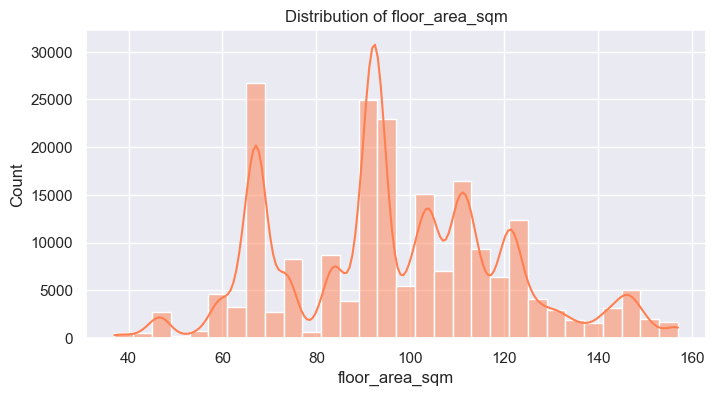

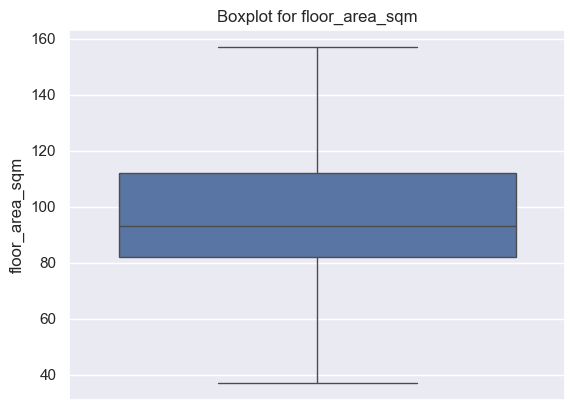

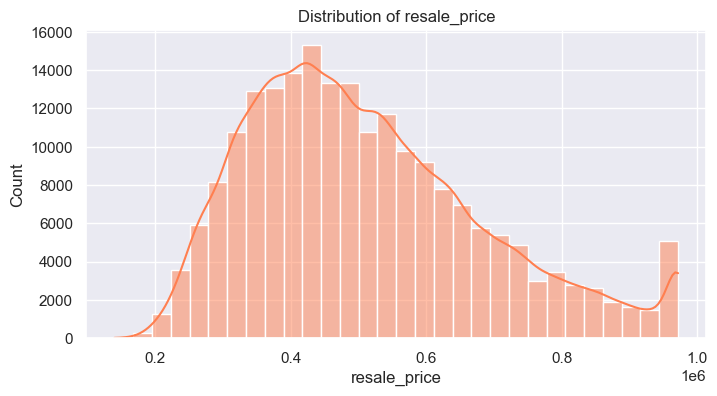

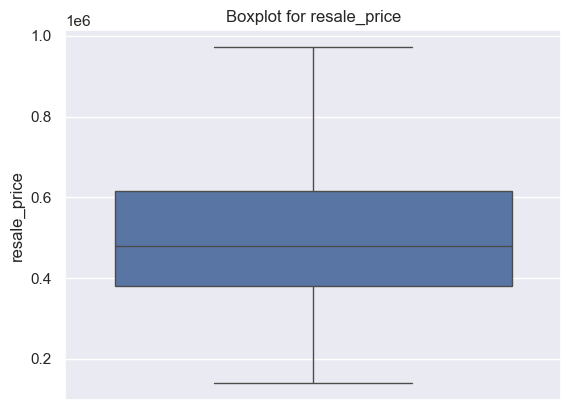

In [19]:
# Univariate Analysis - Numerical Features
numerical_columns = ['floor_area_sqm', 'resale_price']

for col in numerical_columns:
    remove_outlier(df,col)
    disp_histogram(df,col)
    disp_boxplot(df,col)


In [20]:
# Encoding Categorical

In [21]:
town_encode = df.groupby("town")['resale_price'].mean().sort_values(ascending=True)
#Convert to a dictionary with sequential indices and only town names
result1 = {i: town for i, town in enumerate(town_encode.index)}
reverse_mapresult1 = {v: k for k, v in result1.items()}
#Map town names to their corresponding numbers
df['town'] = df['town'].map(reverse_mapresult1)

In [123]:
reverse_mapresult1

{'YISHUN': 0,
 'JURONG WEST': 1,
 'JURONG EAST': 2,
 'ANG MO KIO': 3,
 'WOODLANDS': 4,
 'BEDOK': 5,
 'CHOA CHU KANG': 6,
 'SEMBAWANG': 7,
 'BUKIT BATOK': 8,
 'BUKIT PANJANG': 9,
 'GEYLANG': 10,
 'HOUGANG': 11,
 'SENGKANG': 12,
 'PUNGGOL': 13,
 'CLEMENTI': 14,
 'TOA PAYOH': 15,
 'TAMPINES': 16,
 'MARINE PARADE': 17,
 'SERANGOON': 18,
 'PASIR RIS': 19,
 'KALLANG/WHAMPOA': 20,
 'QUEENSTOWN': 21,
 'BUKIT MERAH': 22,
 'CENTRAL AREA': 23,
 'BISHAN': 24,
 'BUKIT TIMAH': 25}

In [22]:
street_encode = df.groupby(['town', 'street_name'])['resale_price'].mean().sort_values(ascending=True)
street_encode = street_encode.reset_index().set_index('street_name')
#Convert to a dictionary with sequential indices and only town names
result2= {i: street for i, street in enumerate(street_encode.index)}
reverse_mapresult2 = {v: k for k, v in result2.items()}
#Map town names to their corresponding numbers
df['street_name'] = df['street_name'].map(reverse_mapresult2)

In [125]:
reverse_mapresult2

{'LOWER DELTA RD': 0,
 'MACPHERSON LANE': 1,
 'MARSILING CRES': 2,
 'TAO CHING RD': 3,
 'BOON LAY PL': 4,
 'LOR 6 TOA PAYOH': 5,
 "C'WEALTH CL": 6,
 'HO CHING RD': 7,
 'TAMAN HO SWEE': 8,
 'JLN BT HO SWEE': 9,
 "C'WEALTH CRES": 10,
 'JLN KUKOH': 11,
 'CHANGI VILLAGE RD': 12,
 'OLD AIRPORT RD': 13,
 'JLN KLINIK': 14,
 'MARSILING DR': 15,
 'SIN MING RD': 16,
 'TECK WHYE CRES': 17,
 'BEO CRES': 18,
 'KALLANG BAHRU': 19,
 'BEDOK NTH ST 3': 20,
 'WEST COAST RD': 21,
 'YISHUN AVE 5': 22,
 'BT BATOK WEST AVE 4': 23,
 'JLN DUA': 24,
 'BALAM RD': 25,
 'BEDOK STH AVE 1': 26,
 'BT BATOK ST 32': 27,
 'MARSILING LANE': 28,
 'HOUGANG AVE 3': 29,
 'CLEMENTI ST 12': 30,
 'JURONG EAST ST 24': 31,
 'BT BATOK EAST AVE 4': 32,
 'WHAMPOA DR': 33,
 'BT BATOK EAST AVE 5': 34,
 'DOVER RD': 35,
 'TOA PAYOH NTH': 36,
 'WHAMPOA WEST': 37,
 'TECK WHYE AVE': 38,
 'KG KAYU RD': 39,
 'WEST COAST DR': 40,
 'LOR LEW LIAN': 41,
 'BT BATOK WEST AVE 2': 42,
 'YISHUN AVE 3': 43,
 'BEDOK NTH AVE 1': 44,
 'JURONG WEST ST 51

In [23]:
flat_encode = df.groupby("flat_type")['resale_price'].mean().sort_values(ascending=True)
result1 = {i: town for i, town in enumerate(flat_encode.index)}
reverse_mapresult3 = {v: k for k, v in result1.items()}
df['flat_type'] = df['flat_type'].map(reverse_mapresult3)

In [127]:
reverse_mapresult3

{'1 ROOM': 0,
 '2 ROOM': 1,
 '3 ROOM': 2,
 '4 ROOM': 3,
 '5 ROOM': 4,
 'EXECUTIVE': 5,
 'MULTI-GENERATION': 6}

In [24]:
flat_model_encode = df.groupby("flat_model")['resale_price'].mean().sort_values(ascending=True)
result2 = {i: town for i, town in enumerate(flat_model_encode.index)}
reverse_mapresult4 = {v: k for k, v in result2.items()}
df['flat_model'] = df['flat_model'].map(reverse_mapresult4)

In [129]:
reverse_mapresult4

{'2-room': 0,
 'New Generation': 1,
 'Simplified': 2,
 'Model A2': 3,
 'Standard': 4,
 'Model A': 5,
 'Improved': 6,
 'Premium Apartment': 7,
 'Apartment': 8,
 'Adjoined flat': 9,
 '3Gen': 10,
 'Improved-Maisonette': 11,
 'Maisonette': 12,
 'DBSS': 13,
 'Model A-Maisonette': 14,
 'Premium Maisonette': 15,
 'Multi Generation': 16,
 'Terrace': 17,
 'Premium Apartment Loft': 18,
 'Type S1': 19,
 'Type S2': 20}

In [133]:
import json

# Example dictionary
out_feat = {'town_dict':reverse_mapresult1,
            'street_dict':reverse_mapresult2,
            'flat_type_dict':reverse_mapresult3,
            'flat_model_dict':reverse_mapresult4
}

# Save to a JSON file
with open("feat_dict.json", "w") as json_file:
    json.dump(out_feat, json_file, indent=4)


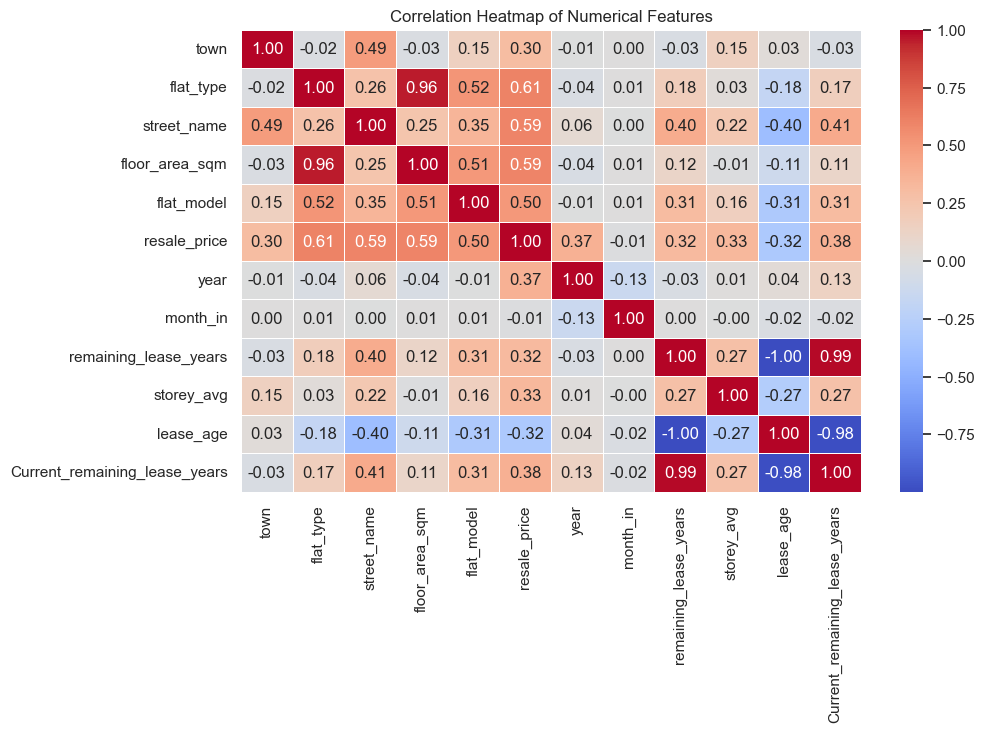

In [25]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [26]:
df.drop(columns=['remaining_lease_years','lease_age','month_in'],inplace=True)

In [70]:
df.drop(columns='month_in',inplace=True)

In [72]:
df=df.drop_duplicates()

In [103]:
df_final

,town,flat_type,street_name,floor_area_sqm,flat_model,resale_price,year,storey_avg,Current_remaining_lease_years
0,3,1,75,44,6,232000,2017,11,53
1,3,2,109,67,1,250000,2017,2,52
2,3,2,71,67,1,262000,2017,2,54
3,3,2,75,68,1,265000,2017,5,54
4,3,2,71,67,1,265000,2017,2,54
...,...,...,...,...,...,...,...,...,...
205796,0,5,265,146,12,960000,2025,2,62
205797,0,5,265,145,8,868888,2025,2,61
205798,0,5,265,146,12,972000,2025,11,62
205799,0,5,265,142,8,972000,2025,8,61


In [97]:
df_final=df.copy()

In [137]:
df.columns

Index(['town', 'flat_type', 'street_name', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'storey_avg', 'Current_remaining_lease_years'],
      dtype='object')

In [139]:
df.describe()

,town,flat_type,street_name,floor_area_sqm,flat_model,resale_price,year,storey_avg,Current_remaining_lease_years
count,199094.000000,199094.000000,199094.000000,199094.000000,199094.000000,199094.000000,199094.000000,199094.000000,199094.000000
mean,10.191226,3.119742,267.414774,96.974499,5.312571,511575.100174,2020.914488,8.728053,69.655630
std,6.801368,0.923099,144.599403,23.868427,2.570219,173153.099255,2.368760,5.895691,14.149994
min,0.000000,0.000000,0.000000,37.000000,0.000000,140000.000000,2017.000000,2.000000,39.000000
25%,4.000000,2.000000,149.000000,82.000000,5.000000,380000.000000,2019.000000,5.000000,58.000000
50%,11.000000,3.000000,259.000000,93.000000,5.000000,482000.000000,2021.000000,8.000000,70.000000
75%,15.000000,4.000000,372.000000,112.000000,6.000000,618000.000000,2023.000000,11.000000,84.000000
max,25.000000,6.000000,573.000000,157.000000,20.000000,972000.000000,2025.000000,50.000000,95.000000


In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [99]:
target_column='resale_price'
y=df_final[target_column]
X=df_final.drop(columns=target_column)
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
#Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE  : 63272.76
MSE  : 6667361890.58
RMSE : 81653.92
R² Score: 0.7811


In [105]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

# Fit the model 
grid_search.fit(X_train, y_train)

# Best estimator and evaluation
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Model Performance:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ragha\anaconda3\Lib\site-packages

Best Random Forest Model Performance:
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
MAE  : 22053.71
MSE  : 921881046.49
RMSE : 30362.49
R² Score: 0.9697


In [107]:
# Define parameter grid for hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Grid search with cross-validation
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit model on training data
grid_search_gb.fit(X_train, y_train)

# Best estimator after tuning
best_gb = grid_search_gb.best_estimator_

# Make predictions
y_pred_gb = best_gb.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("\nBest Gradient Boosting Model Performance:")
print(f"Best Params : {grid_search_gb.best_params_}")
print(f"MAE         : {mae_gb:.2f}")
print(f"MSE         : {mse_gb:.2f}")
print(f"RMSE        : {rmse_gb:.2f}")
print(f"R² Score    : {r2_gb:.4f}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits

Best Gradient Boosting Model Performance:
Best Params : {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
MAE         : 22624.23
MSE         : 920250466.70
RMSE        : 30335.63
R² Score    : 0.9698


In [141]:
import sklearn
print(sklearn.__version__)


1.5.1


In [108]:
def plot_feature_importance(model, feature_names, model_name="Model"):
    """
    Plots feature importance for linear regression or tree-based models.
    
    Parameters:
        model: Trained model (LinearRegression, RandomForestRegressor, or GradientBoostingRegressor)
        feature_names: List of feature names
        model_name: String name of the model (for title)
    """
    if hasattr(model, "coef_"):
        # For Linear Regression
        importances = np.abs(model.coef_)
        title = f"{model_name} (Absolute Coefficients)"
    elif hasattr(model, "feature_importances_"):
        # For Tree-based models
        importances = model.feature_importances_
        title = f"{model_name} (Feature Importances)"
    else:
        raise ValueError("Model does not have coef_ or feature_importances_ attribute.")

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df["Feature"], importance_df["Importance"])
    plt.gca().invert_yaxis()  # Most important at top
    plt.xlabel("Importance")
    plt.title(title)
    plt.tight_layout()
    plt.show()

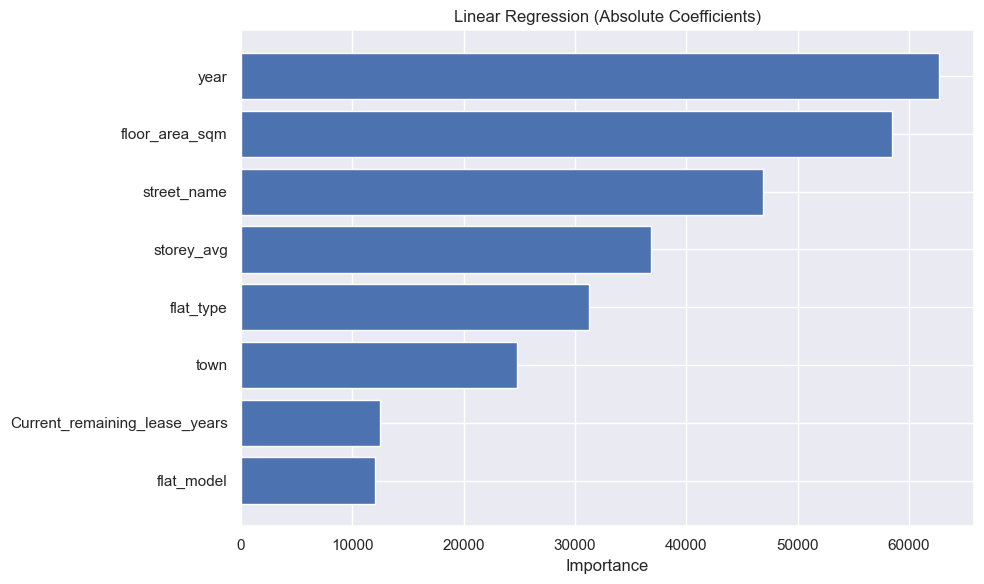

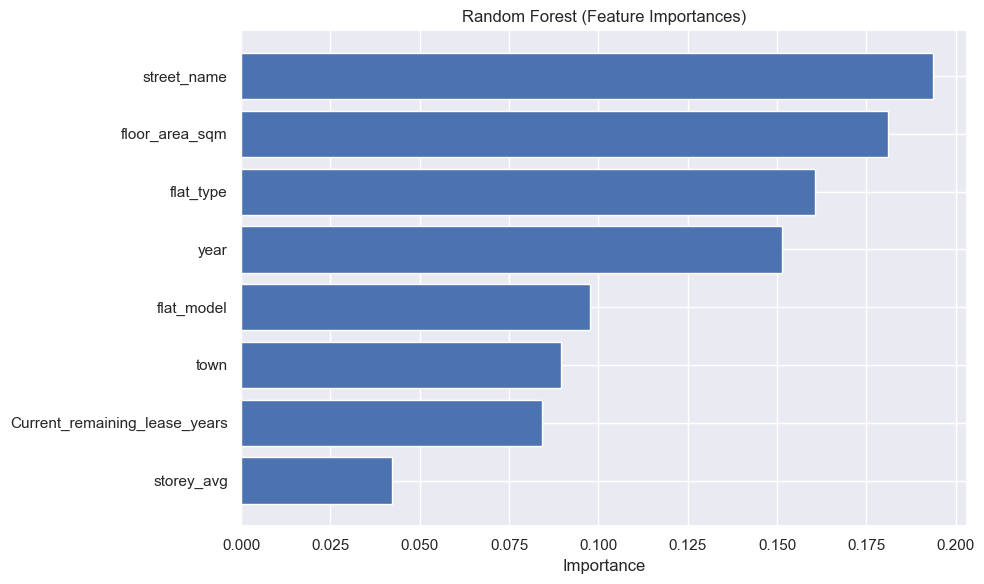

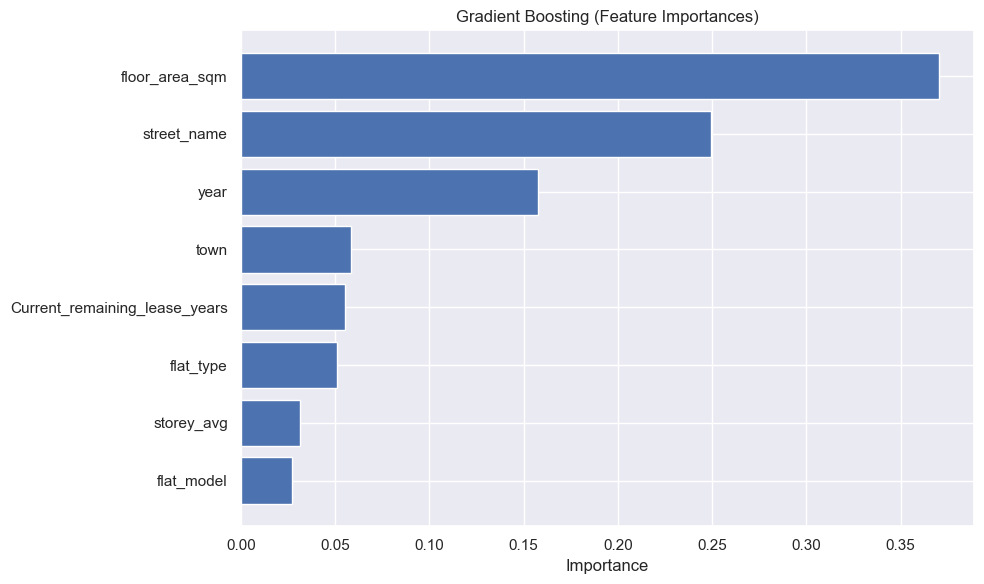

In [113]:
# For Linear Regression
plot_feature_importance(lr_model, X_train.columns, model_name="Linear Regression")

# For Random Forest
plot_feature_importance(best_rf, X_train.columns, model_name="Random Forest")

# For Gradient Boosting
plot_feature_importance(best_gb, X_train.columns, model_name="Gradient Boosting")

In [121]:
# Paths for saving
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(best_gb, 'gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("All models and scaler have been pickled successfully.")

All models and scaler have been pickled successfully.
